# 🔹UFC Fight Predictor Feature Engineering

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 1. Import Libraries and Setup Environment

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root, 'src'))
from helpers import *
from io_model import *
from data import UFCData

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 2. Load Data

In [2]:
# Define the path to the CSV file
file_path = os.path.join(project_root, 'data', 'processed', 'ufc_etl.csv')

# Load the CSV into a DataFrame
try:
    ufc_df = pd.read_csv(file_path)
    print_header(f"Data loaded succesfully", color='bright_green')
except Exception as e:
    print_header(f"Error loading data: {e}", color='bright_red')

╔═══════════════════════════╗
║  Data loaded succesfully  ║
╚═══════════════════════════╝


<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 3. Initialize UFCData object

In [3]:
ufc_data = UFCData(ufc_df)
ufc_data.summary()

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6541
🧪 Train/Test split  : 5232 / 1309
🧪 Total features     : 68

🔢 Numerical features : 63
🔠 Categorical features: 5
    - Binary          : 2
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3795 (58.0%)
   - Class 1: 2746 (42.0%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                                mean      std     min       max
NumberOfRounds                 3.187    0.580    3.00     5.000
BlueCurrentLoseStreak          0.502    0.798    0.00     5.000
BlueCurrentWinStreak           0.959    1.391    0.00    12.000
BlueDraws                      0.023    0.155    0.00     2.000
BlueAvgSigStrLanded           19.800   18.830    0.00   154.000
BlueAvgSigStrPct               0.453    0.105    0.00     1.000
BlueAvgSubAtt                  0.500    0.634    0.00     8.400
BlueAvgTDLanded                1.315    1.261    0.00    10.610
BlueAvgTDPct

## 4. Feature Engineering

### Categorical Data

### Stance
- **Orthodox Stance:** A fighter in orthodox stance leads with their left foot and left hand, making it the natural stance for right-handed individuals. 
- **Southpaw Stance:** A fighter in southpaw stance leads with their right foot and right hand, making it the natural stance for left-handed individuals. 
- **Open Stance Matchup:** When one fighter is orthodox and the other is southpaw, it creates an "open stance" matchup. This differs from a "closed stance" where both fighters are in the same stance (e.g., both orthodox or both southpaw)
- **Switch:** When a fighter switches from an orthodox to a southpaw stance or vice versa, it can disrupt their opponent's rhythm, causing them to miss or react incorrectly to strikes. 

### Feature Construction

In [4]:
# Finish Rate (Red & Blue):
RedFinishRate = (ufc_df['RedWinsByKO'] + ufc_df['RedWinsBySubmission'] + ufc_df['RedWinsByTKODoctorStoppage']) / ufc_df['RedWins'].replace(0, 1)
BlueFinishRate = (ufc_df['BlueWinsByKO'] + ufc_df['BlueWinsBySubmission'] + ufc_df['BlueWinsByTKODoctorStoppage']) / ufc_df['BlueWins'].replace(0, 1)
ufc_df['FinishRate'] = BlueFinishRate - RedFinishRate

In [5]:
#Win Ratio (Red & Blue)
RedWinRatio = ufc_df['RedWins'] / (ufc_df['RedWins'] + ufc_df['RedLosses']).replace(0, 1)
BlueWinRatio = ufc_df['BlueWins'] / (ufc_df['BlueWins'] + ufc_df['BlueLosses']).replace(0, 1)
ufc_df['WinRatio']= BlueWinRatio - RedWinRatio 

In [6]:
# Experience per Age
RedExpPerAge = ufc_df['RedTotalRoundsFought'] / ufc_df['RedAge']
BlueExpPerAge = ufc_df['BlueTotalRoundsFought'] / ufc_df['BlueAge']
ufc_df['ExpPerAge'] = RedExpPerAge - BlueExpPerAge

In [7]:
# Reach Advantage Ratio
ufc_df['ReachAdvantageRatio'] = ufc_df['RedReachCms'] / ufc_df['BlueReachCms']

In [8]:
# Height/Reach Ratio
RedHeightReachRatio = ufc_df['RedHeightCms'] / ufc_df['RedReachCms']
BlueHeightReachRatio = ufc_df['BlueHeightCms'] / ufc_df['BlueReachCms']
ufc_df['HeightReachRatio']= BlueHeightReachRatio - RedHeightReachRatio

In [9]:
# Win By Decision
BlueWinsByDecision = ufc_df[['BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous']].sum(axis=1)
RedWinsByDecision = ufc_df[['RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous']].sum(axis=1)
ufc_df['WinsByDecision']=BlueWinsByDecision- RedWinsByDecision

In [10]:
# Decision Rate
BlueDecisionRate = BlueWinsByDecision / ufc_df['BlueWins'].replace(0, 1)  # Evitar división por cero
RedDecisionRate = RedWinsByDecision  / ufc_df['RedWins'].replace(0, 1)  # Evitar división por cero
ufc_df['DecisionRate']= BlueDecisionRate - RedDecisionRate

## 5. Update UFCData object

In [11]:
ufc_data = UFCData(ufc_df)
ufc_data.summary()

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6541
🧪 Train/Test split  : 5232 / 1309
🧪 Total features     : 75

🔢 Numerical features : 70
🔠 Categorical features: 5
    - Binary          : 2
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3795 (58.0%)
   - Class 1: 2746 (42.0%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                                mean      std      min       max
NumberOfRounds                 3.187    0.580    3.000     5.000
BlueCurrentLoseStreak          0.502    0.798    0.000     5.000
BlueCurrentWinStreak           0.959    1.391    0.000    12.000
BlueDraws                      0.023    0.155    0.000     2.000
BlueAvgSigStrLanded           19.800   18.830    0.000   154.000
BlueAvgSigStrPct               0.453    0.105    0.000     1.000
BlueAvgSubAtt                  0.500    0.634    0.000     8.400
BlueAvgTDLanded                1.315    1.261    0.000    10.610
Blu

## 6. Check Correlation Matrix

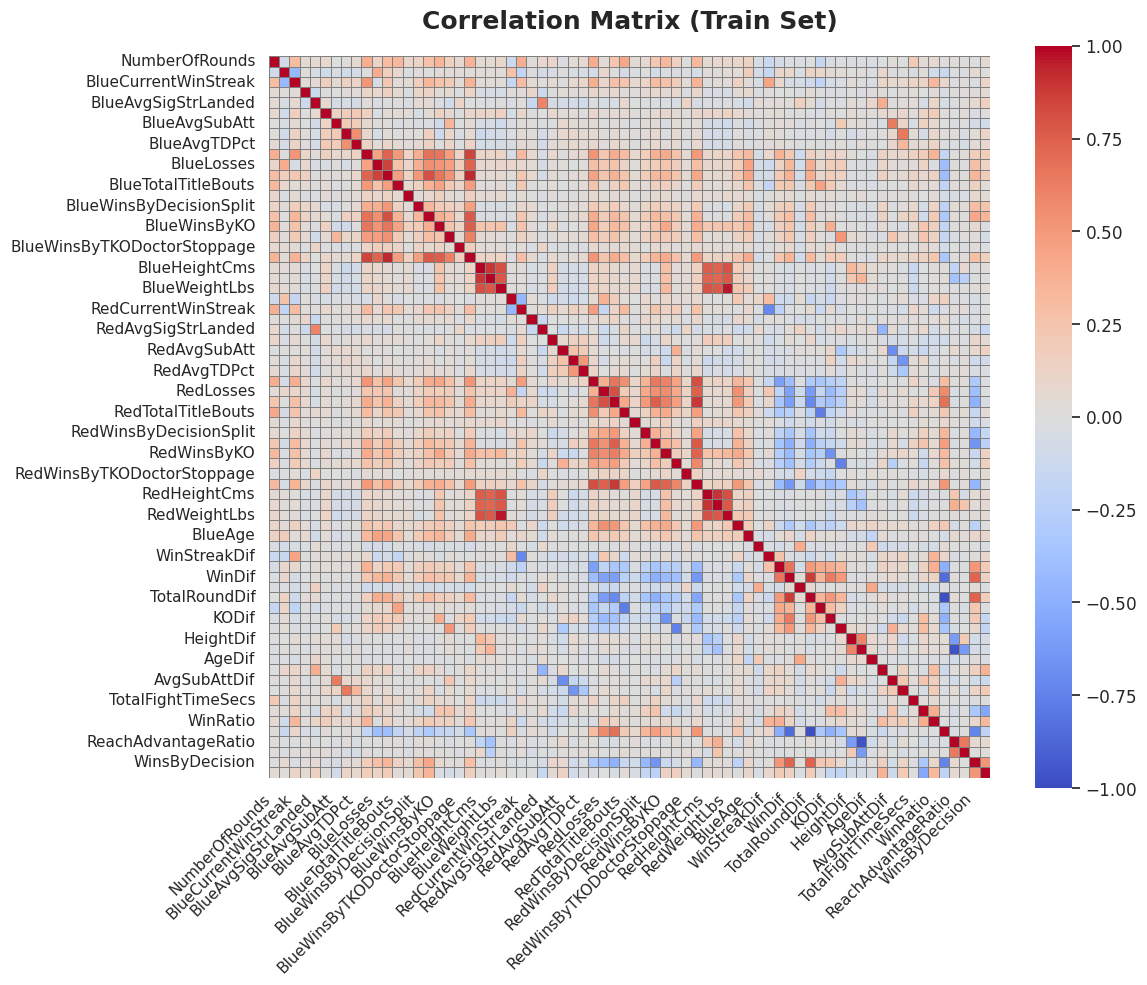

In [12]:
status = False
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)
ufc_data.plot_corr(processed = status)

### Feature Selection

Dado lo siguiente:
-  LoseStreakDif: BlueCurrentLoseStreak - RedCurrentLoseStreak
-  WinStreakDif: BlueCurrentWinStreak - RedCurrentWinStreak
-  LongestWinStreakDif: BlueLongestWinStreak - 'RedLongestWinStreak
-  WinDif: BlueWins - RedWins
-  LossDif: BlueLosses - RedLosses
-  TotalRoundDif: BlueTotalRoundsFought - RedTotalRoundsFought
-  TotalTitleBoutDif: BlueTotalTitleBouts - RedTotalTitleBouts
-  KODif: BlueWinsByKO - RedWinsByKO
-  SubDif: BlueWinsBySubmission - RedWinsBySubmission
-  HeightDif: BlueHeightCms - RedHeightCms
-  ReachDif: BlueReachCms - RedReachCms
-  AgeDif: BlueAge - RedAge
  
Se eliminan ciertas columnas que pueden ser redundantes.

In [13]:
ufc_df=ufc_df.drop(['BlueCurrentLoseStreak', 'RedCurrentLoseStreak','BlueCurrentWinStreak',
                      'RedCurrentWinStreak','BlueLongestWinStreak', 'RedLongestWinStreak', 'BlueWins',
                      'RedWins','BlueLosses','RedLosses', 'BlueTotalRoundsFought','RedTotalRoundsFought',
                      'BlueTotalTitleBouts', 'RedTotalTitleBouts', 'BlueWinsByKO', 'RedWinsByKO', 'BlueWinsBySubmission',
                      'RedWinsBySubmission','BlueHeightCms','RedHeightCms','BlueReachCms','RedReachCms',
                      'BlueAge', 'RedAge'], axis=1)

También aquellas relacionadas con los features construidos:
- WinsByDecision
- DecisionRate
- FinishRate


In [14]:
ufc_df=ufc_df.drop(['BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous',
       'BlueWinsByTKODoctorStoppage', 'RedWinsByDecisionMajority',
       'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous',
       'RedWinsByTKODoctorStoppage','BlueWinsByDecisionMajority'], axis=1)

### Low Variance columns
- BlueDraws
- RedDraws
- BlueWeightLbs
- RedWeightLbs
- TitleBout_True 

In [15]:
ufc_df = ufc_df.drop(['BlueDraws','RedDraws','BlueWeightLbs','RedWeightLbs'], axis=1)

In [16]:
# Preview the first few records
display(ufc_df.head())
display(ufc_df.columns)

,TitleBout,Gender,NumberOfRounds,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueStance,RedAvgSigStrLanded,...,BetterRank,TotalFightTimeSecs,label,FinishRate,WinRatio,ExpPerAge,ReachAdvantageRatio,HeightReachRatio,WinsByDecision,DecisionRate
0,False,MALE,5,4.13,0.36,0.0,1.96,0.46,Southpaw,3.88,...,Red,882.0,1,0.283333,-0.035714,0.477778,0.947368,-0.065058,-4,-0.283333
1,False,MALE,3,7.36,0.56,1.1,1.24,0.23,Orthodox,4.67,...,neither,696.0,0,0.293233,0.042614,1.222222,1.000000,0.028571,-9,-0.293233
2,False,MALE,3,3.32,0.48,0.2,2.26,0.28,Orthodox,4.44,...,Red,717.0,0,0.500000,0.095238,0.077799,1.046154,0.028733,-2,-0.500000
3,False,MALE,3,5.50,0.47,0.0,0.36,0.25,Orthodox,2.82,...,neither,824.0,1,-0.100000,-0.261905,-0.453704,1.013158,0.025803,2,0.100000
4,False,MALE,3,5.94,0.52,0.0,0.25,0.50,Orthodox,6.51,...,neither,900.0,1,-0.607143,0.222222,0.064516,1.014493,0.013872,2,0.607143


Index(['TitleBout', 'Gender', 'NumberOfRounds', 'BlueAvgSigStrLanded',
       'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct',
       'BlueStance', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt',
       'RedAvgTDLanded', 'RedAvgTDPct', 'RedStance', 'LoseStreakDif',
       'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif',
       'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif',
       'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif',
       'BetterRank', 'TotalFightTimeSecs', 'label', 'FinishRate', 'WinRatio',
       'ExpPerAge', 'ReachAdvantageRatio', 'HeightReachRatio',
       'WinsByDecision', 'DecisionRate'],
      dtype='object')

## 7. Update UFCData object

In [17]:
ufc_data = UFCData(ufc_df)
ufc_data.summary()

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6541
🧪 Train/Test split  : 5232 / 1309
🧪 Total features     : 39

🔢 Numerical features : 34
🔠 Categorical features: 5
    - Binary          : 2
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3795 (58.0%)
   - Class 1: 2746 (42.0%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                        mean      std      min       max
NumberOfRounds         3.187    0.580    3.000     5.000
BlueAvgSigStrLanded   19.800   18.830    0.000   154.000
BlueAvgSigStrPct       0.453    0.105    0.000     1.000
BlueAvgSubAtt          0.500    0.634    0.000     8.400
BlueAvgTDLanded        1.315    1.261    0.000    10.610
BlueAvgTDPct           0.324    0.224    0.000     1.000
RedAvgSigStrLanded    21.121   19.175    0.000   141.000
RedAvgSigStrPct        0.460    0.096    0.000     1.000
RedAvgSubAtt           0.536    0.684    0.000     8.400
RedAvgTDLanded    

## 8. Check Correlation Matrix

In [18]:
status = False
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)

,Feature 1,Feature 2,Correlation
420,TotalRoundDif,ExpPerAge,0.980629
491,ReachDif,ReachAdvantageRatio,0.965241
372,WinDif,TotalRoundDif,0.868544
385,WinDif,ExpPerAge,0.849347
423,TotalRoundDif,WinsByDecision,0.741877
553,ExpPerAge,WinsByDecision,0.737463
388,WinDif,WinsByDecision,0.732486
251,RedAvgSubAtt,AvgSubAttDif,0.694582
351,LongestWinStreakDif,WinDif,0.660869
276,RedAvgTDLanded,AvgTDDif,0.655455


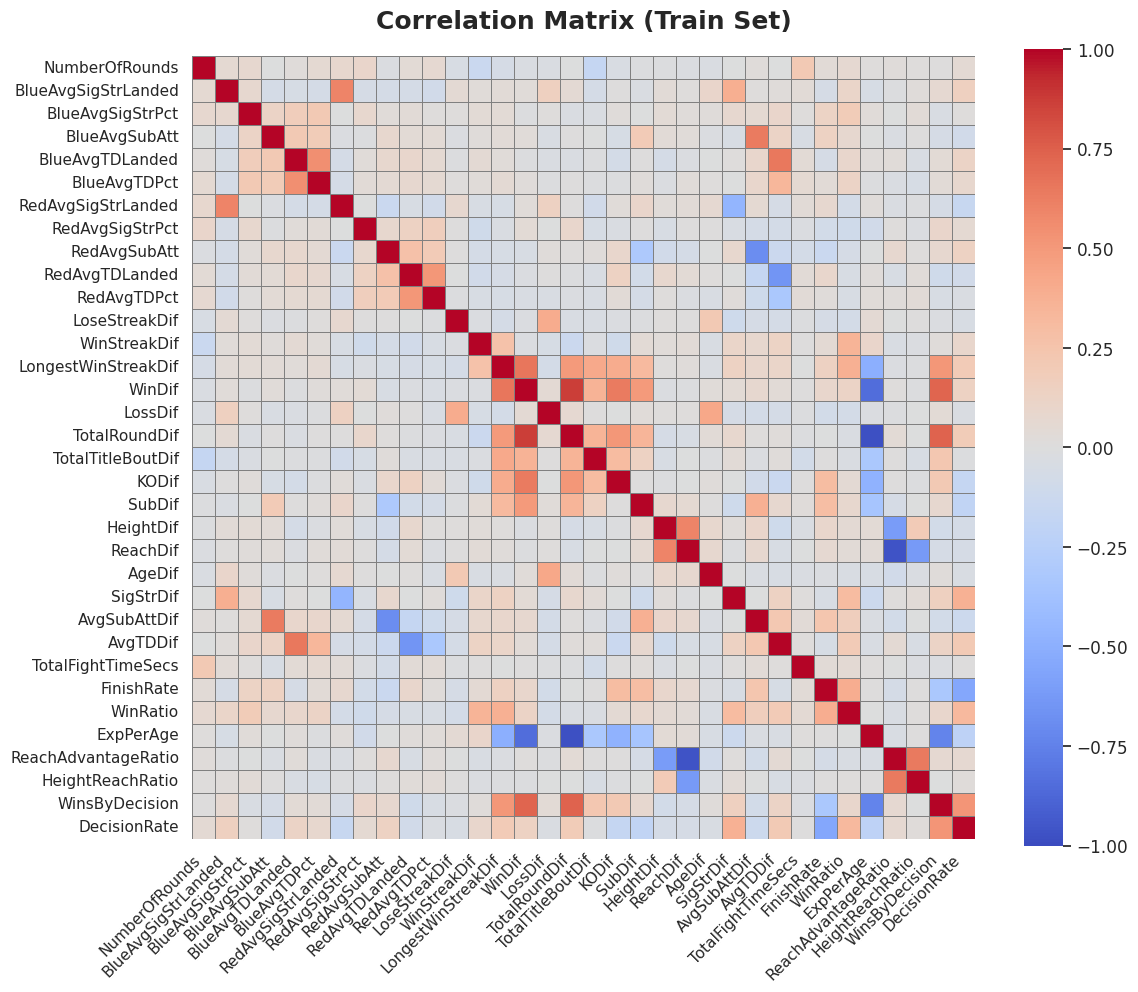

In [19]:
ufc_data.plot_corr(processed = status)

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 9. Inicialize Modeling Data: Standarize Numerical Data & Encode Categorical Data

In [20]:
ufc_data.standardize()
ufc_data.encode()

## 10. Check Modeling Correlation Matrix

In [21]:
status = True
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)

,Feature 1,Feature 2,Correlation
894,TotalRoundDif,ExpPerAge,0.980629
405,BetterRank_Red,BetterRank_neither,0.967431
965,ReachDif,ReachAdvantageRatio,0.965241
846,WinDif,TotalRoundDif,0.868544
859,WinDif,ExpPerAge,0.849347
255,RedStance_Orthodox,RedStance_Southpaw,0.846054
89,BlueStance_Orthodox,BlueStance_Southpaw,0.840822
897,TotalRoundDif,WinsByDecision,0.741877
1027,ExpPerAge,WinsByDecision,0.737463
862,WinDif,WinsByDecision,0.732486


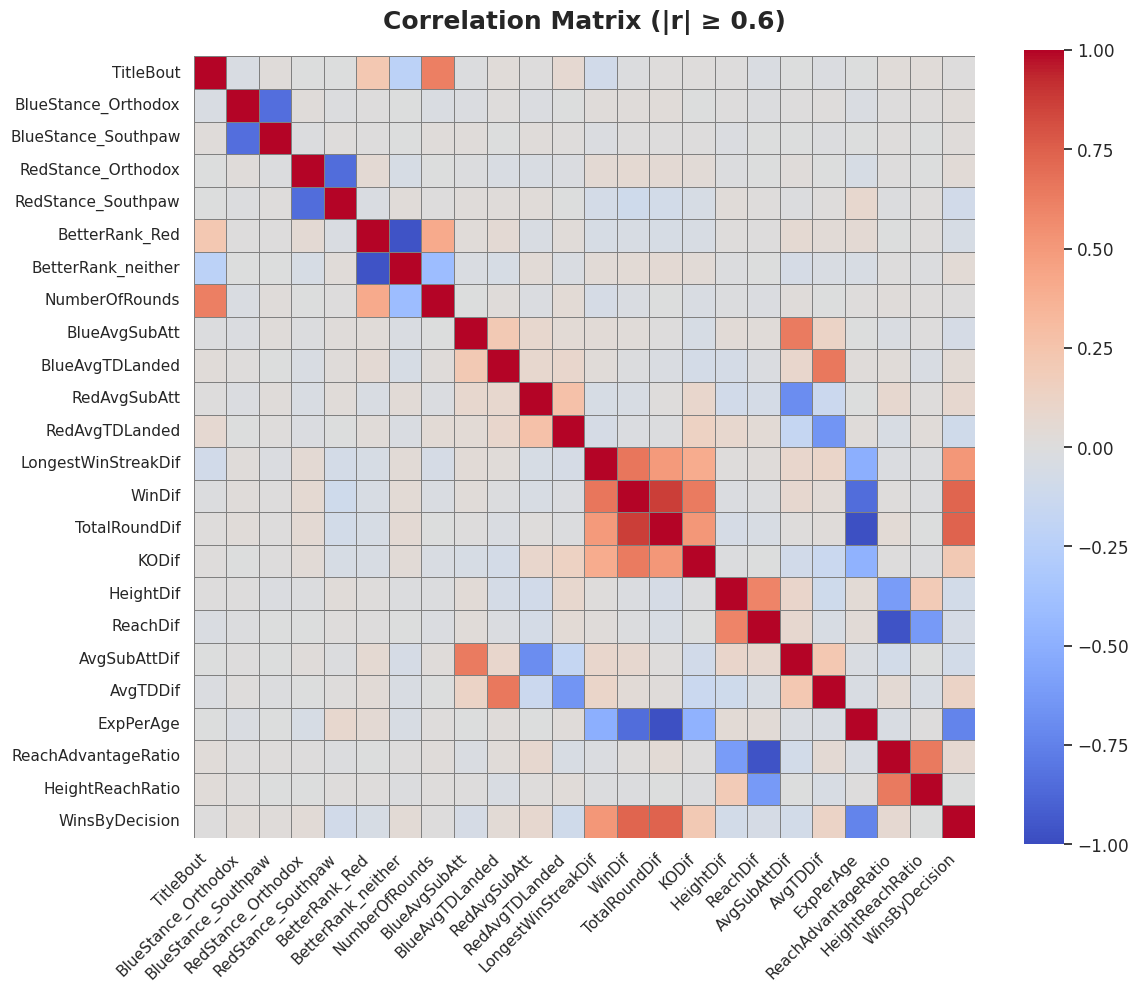

In [22]:
ufc_data.plot_corr(processed = status, threshold = 0.6)

## 11. Check Modeling Data

In [23]:
ufc_data._X_train_processed

,TitleBout,Gender_MALE,BlueStance_Orthodox,BlueStance_Southpaw,BlueStance_Switch,RedStance_Open Stance,RedStance_Orthodox,RedStance_Southpaw,RedStance_Switch,BetterRank_Blue,...,AvgSubAttDif,AvgTDDif,TotalFightTimeSecs,FinishRate,WinRatio,ExpPerAge,ReachAdvantageRatio,HeightReachRatio,WinsByDecision,DecisionRate
5014,0,1,0,1,0,0,0,1,0,0,...,-1.025880,0.102213,0.708351,0.161448,0.275168,-0.164815,-0.035200,0.369952,0.268586,0.133795
3094,0,1,0,1,0,0,1,0,0,0,...,0.079948,0.102213,-1.000753,0.161448,0.275168,-0.323718,-0.035200,1.528038,0.268586,0.133795
3760,0,1,0,1,0,0,1,0,0,0,...,-0.104394,-0.184490,2.458287,-0.755016,-0.415658,0.941574,1.652897,2.497677,-0.940745,1.094677
3951,0,1,1,0,0,0,1,0,0,0,...,0.448520,0.102213,0.708351,-0.525900,0.275168,-1.034251,-1.538300,-1.625058,0.671696,0.854457
6431,0,1,1,0,0,0,0,1,0,0,...,-1.394452,0.675620,-0.924923,-0.525900,0.275168,-0.006187,-0.949586,-0.810404,-0.134524,0.854457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,0,1,1,0,0,0,1,0,0,0,...,-0.235987,0.347976,2.458287,0.092713,0.373858,0.502277,-0.316550,-0.745772,-0.537635,0.205861
2366,0,1,1,0,0,0,1,0,0,0,...,-1.799959,-0.677620,0.708351,-0.400928,0.543125,-2.770739,0.819810,1.709242,2.687248,0.723427
2982,0,1,0,1,0,0,1,0,0,0,...,0.102064,-0.207426,-1.432404,-1.728758,1.712087,2.823551,-0.344288,-0.025277,0.671696,2.115615
4536,0,0,1,0,0,0,1,0,0,0,...,-1.578793,-3.338228,0.708351,0.161448,-1.106484,0.118286,-0.035200,-0.476341,-0.134524,-2.028191


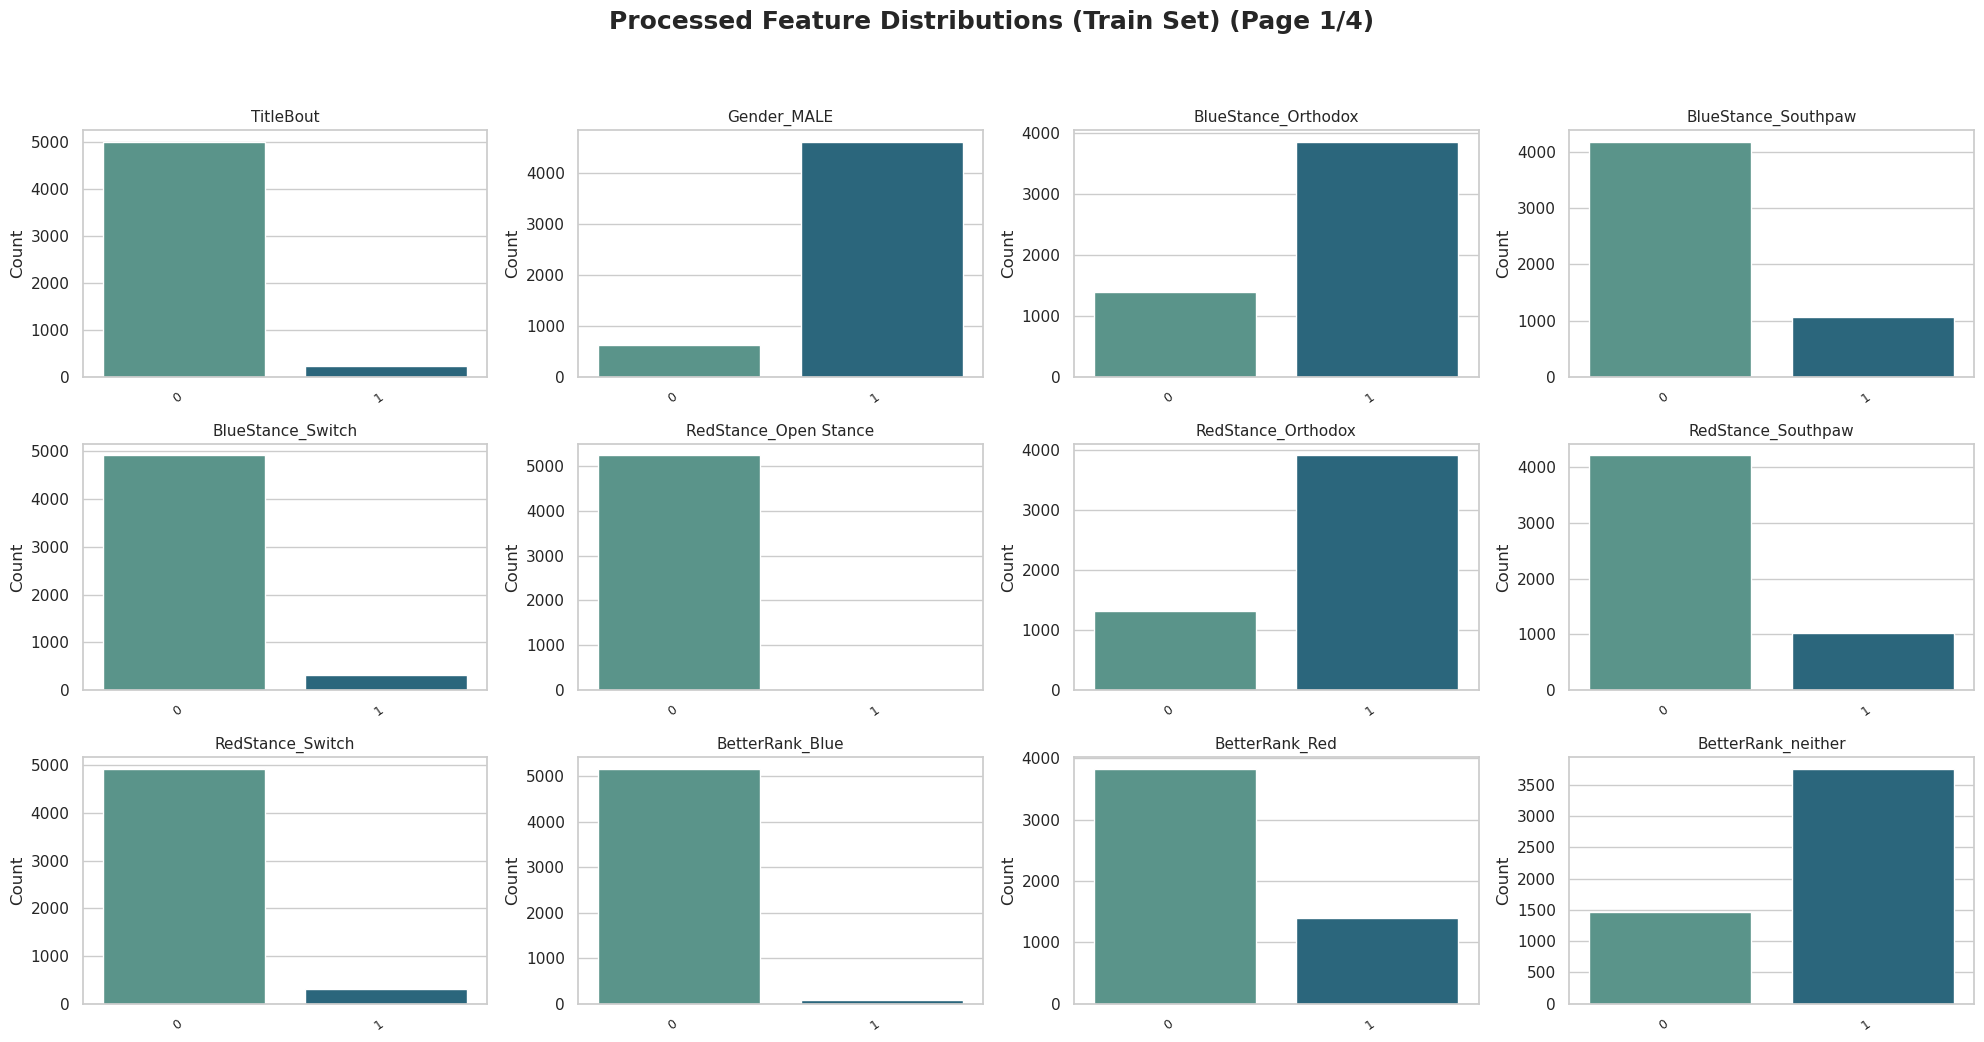

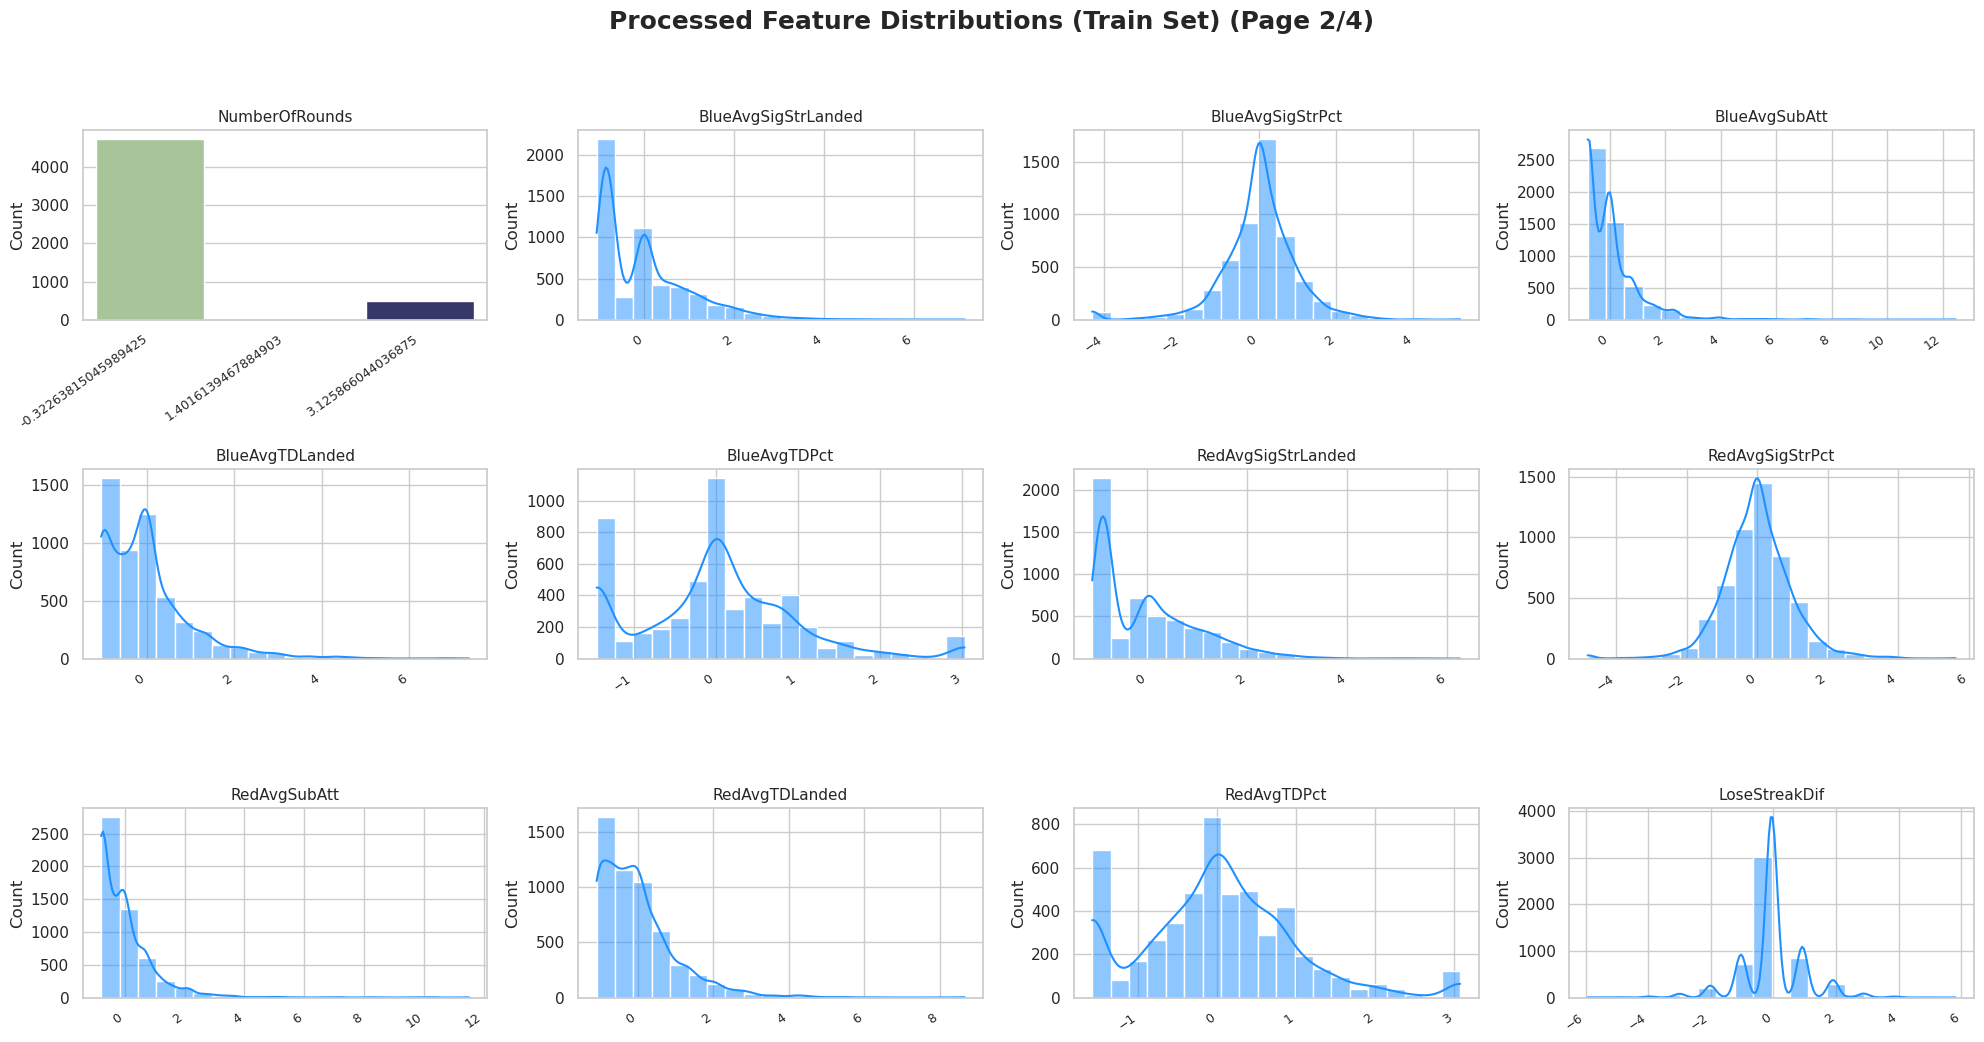

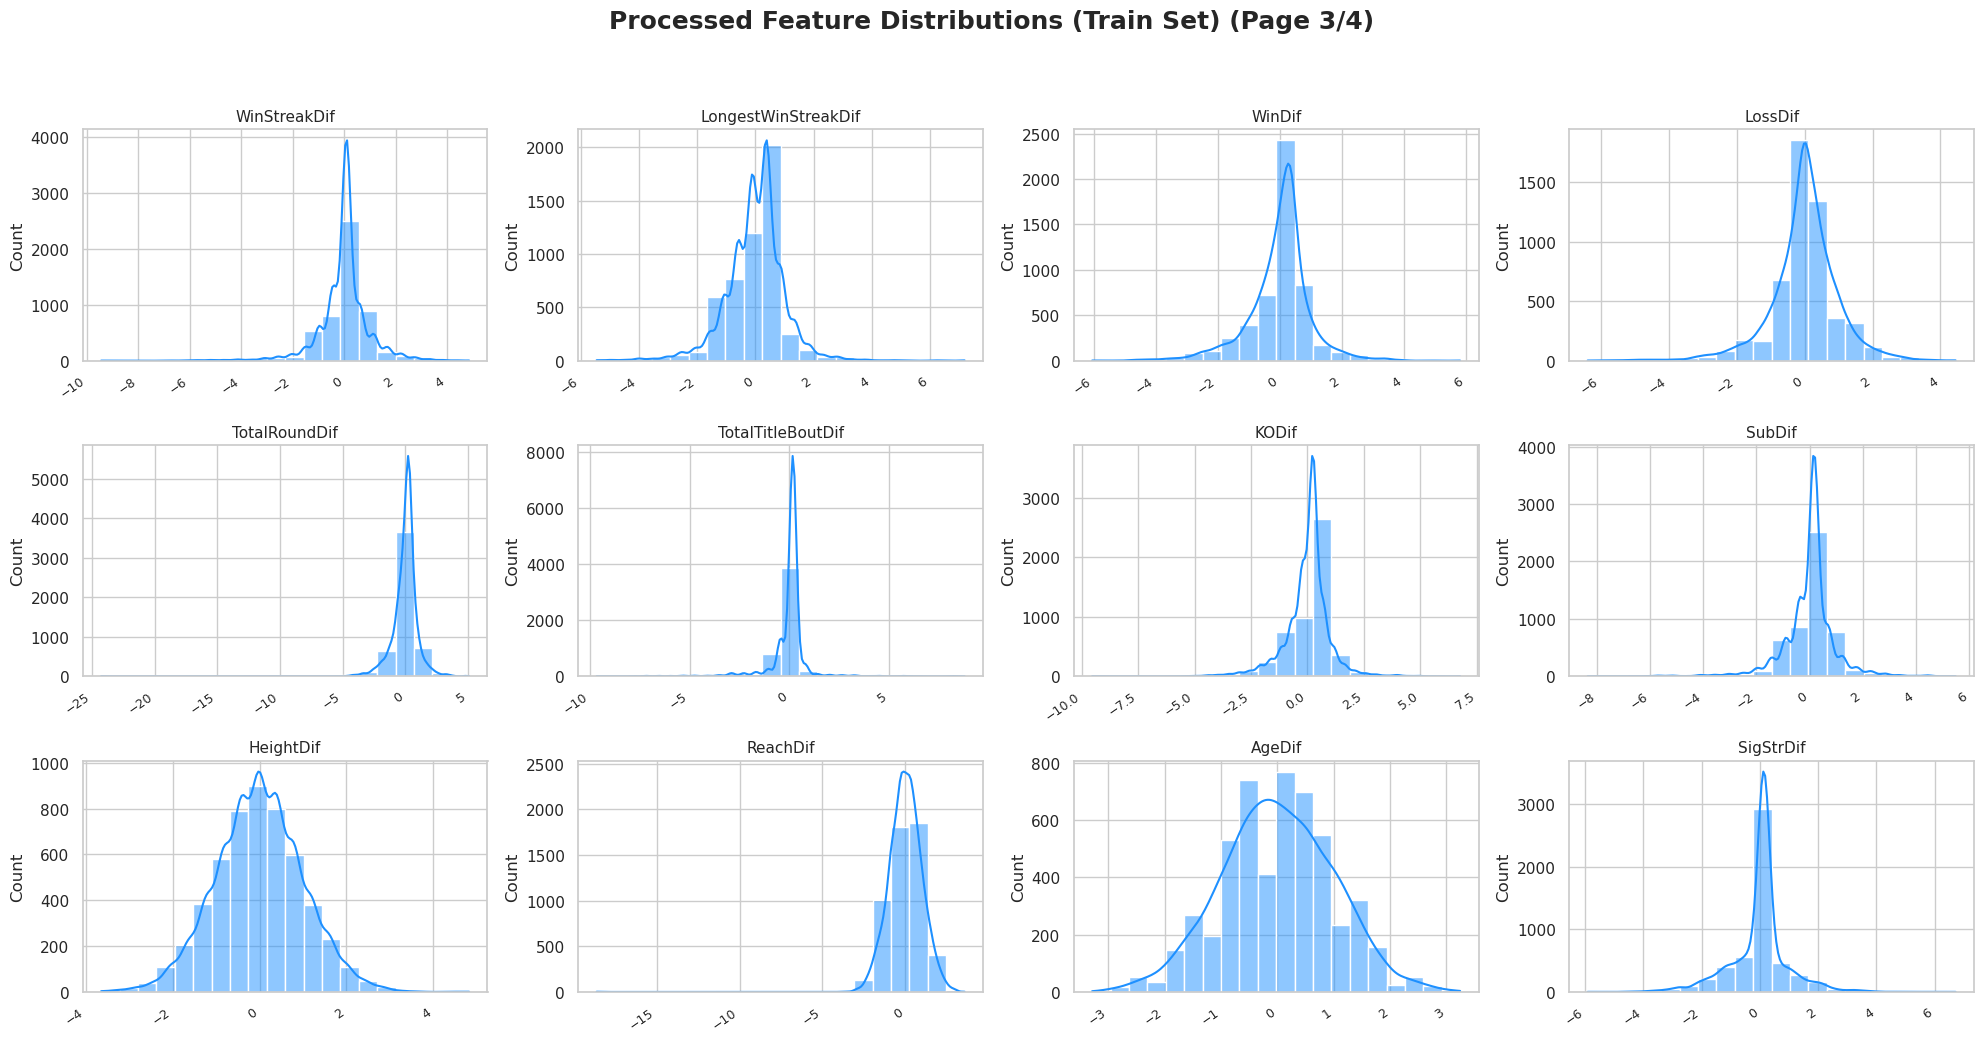

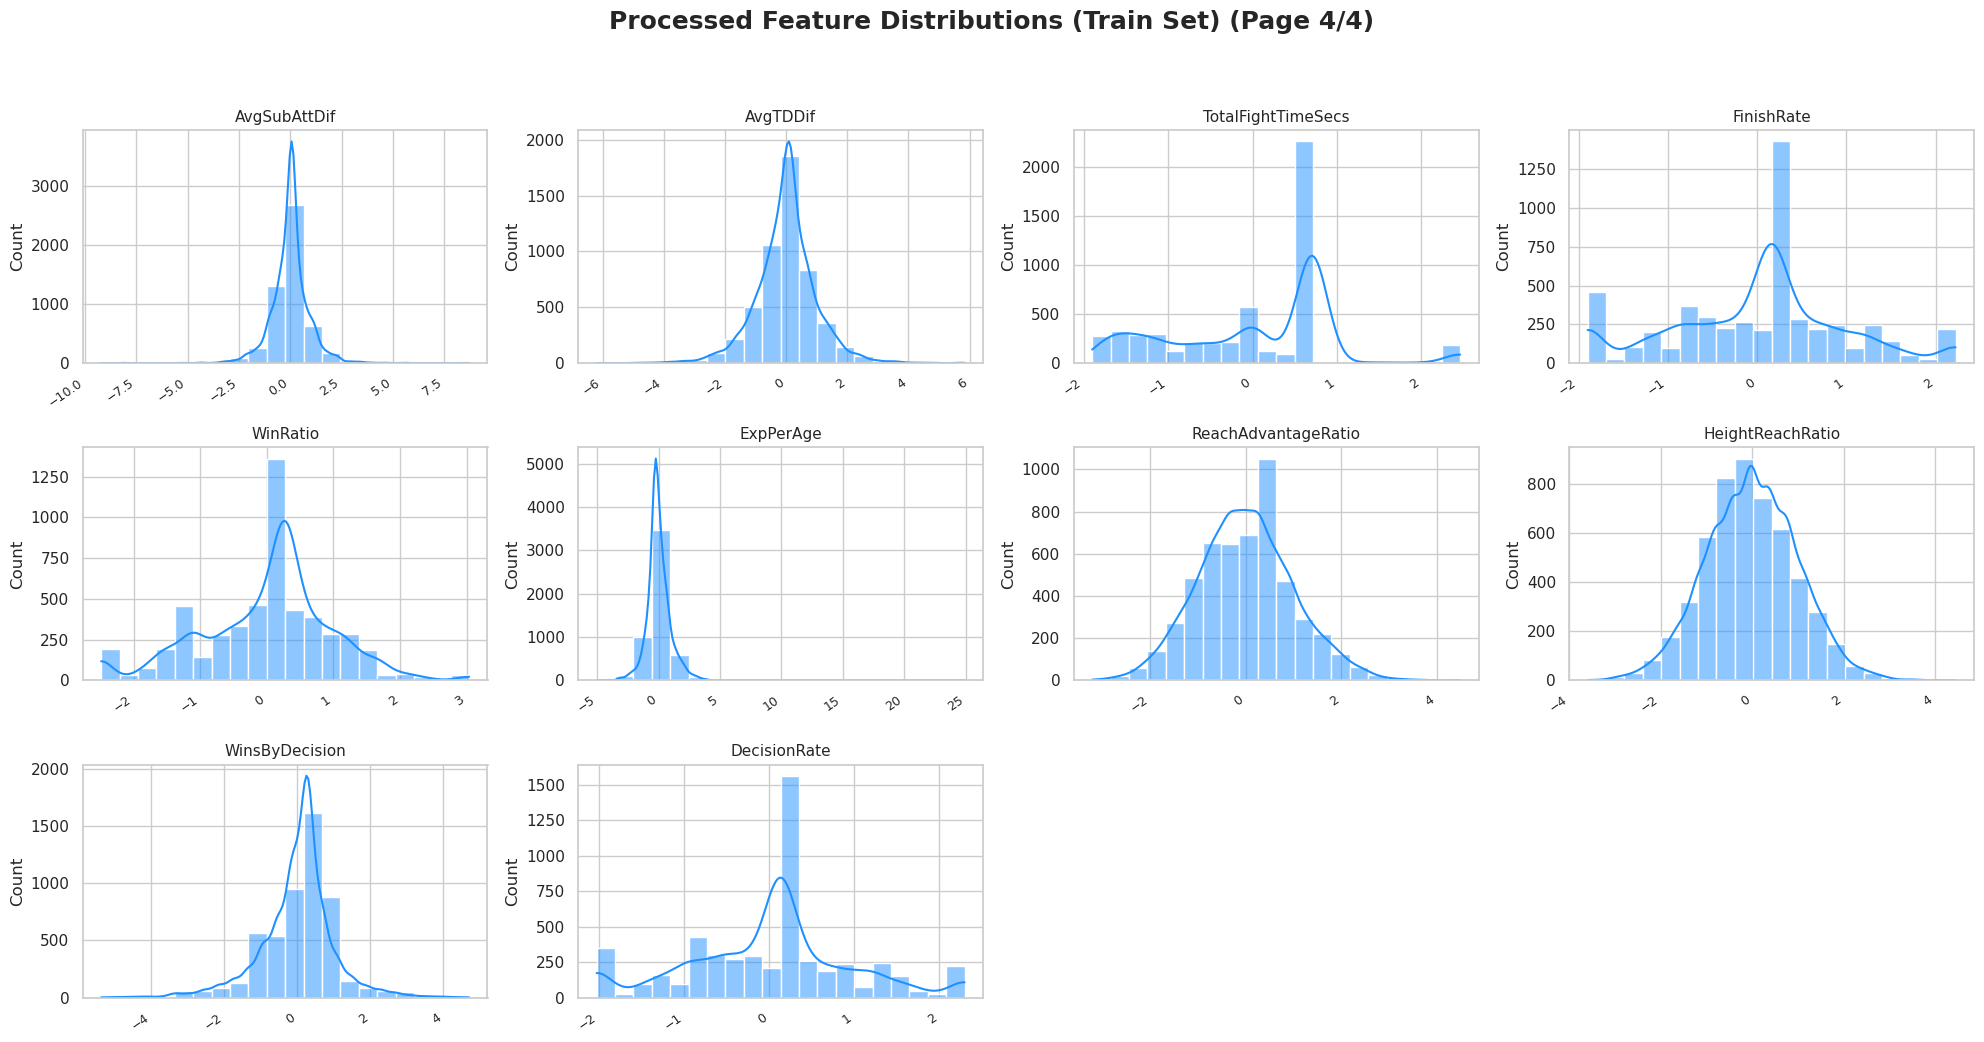

In [24]:
ufc_data.plot_feature_distributions(processed = True)

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 12. Save

In [25]:
ufc_modeling_data = ufc_data

In [26]:
save_data(ufc_modeling_data)

✅ UFCData object saved to: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl


In [27]:
save_ufc_datasets(ufc_modeling_data, project_root)

✅ UFCData object saved to: dict_keys(['ufc_train.csv', 'ufc_test.csv', 'ufc_processed_train.csv', 'ufc_processed_test.csv'])


<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>